In [1]:
import pandas as pd
import numpy as np

import seaborn as snss
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle,json
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_original = pd.read_csv("Telco_churn.csv")
df = df_original.copy()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df = df.drop(["customerID"], axis =1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
def str_float(string):
    try:
        return float(string)
    except:
        return np.nan   

In [6]:
df.TotalCharges = df.TotalCharges.apply(str_float)

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.TotalCharges.astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [9]:
df.Partner.value_counts()       

No     3639
Yes    3393
Name: Partner, dtype: int64

In [10]:
df.Dependents.value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [11]:
df.MultipleLines

0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042                  No
Name: MultipleLines, Length: 7032, dtype: object

In [12]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [13]:
df.OnlineSecurity

0        No
1       Yes
2       Yes
3       Yes
4        No
       ... 
7038    Yes
7039     No
7040    Yes
7041     No
7042    Yes
Name: OnlineSecurity, Length: 7032, dtype: object

In [14]:
df.OnlineBackup

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
7038     No
7039    Yes
7040     No
7041     No
7042     No
Name: OnlineBackup, Length: 7032, dtype: object

In [15]:
df.DeviceProtection

0        No
1       Yes
2        No
3       Yes
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: DeviceProtection, Length: 7032, dtype: object

In [16]:
x_original = df.drop(["Churn","MonthlyCharges","TotalCharges"],axis = 1)
x=x_original.copy()

In [17]:
y = df.Churn

In [18]:
y = y.replace({"No":0,"Yes":1})

In [19]:
x = pd.get_dummies(x)
x.shape

(7032, 43)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=30,stratify=y)

# Model Building

## Model: Logistic Regression

In [21]:
LogReg_model = LogisticRegression()
LogReg_model.fit(x_train,y_train)
y_pred_train = LogReg_model.predict(x_train)
y_pred_test = LogReg_model.predict(x_test)

In [22]:
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)

In [23]:
accuracy_train,accuracy_test

(0.8031288094270622, 0.8056872037914692)

In [24]:
Ridge_model = RidgeClassifier()

params_grid = {
    "alpha" : np.arange(0.01,10,0.01)
    }

gscv = RandomizedSearchCV(Ridge_model,params_grid)
gscv.fit(x_train,y_train)
gscv.best_estimator_

Ridge_model = gscv.best_estimator_
Ridge_model.fit(x_train,y_train)

y_pred_train = Ridge_model.predict(x_train)
y_pred_test = Ridge_model.predict(x_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)

accuracy_train,accuracy_test

(0.8043478260869565, 0.8037914691943128)

# Oversampling : random_oversampler

In [25]:
# from imblearn.over_sampling import SMOTE

In [26]:
from imblearn.over_sampling import RandomOverSampler
random_oversampler = RandomOverSampler()

In [27]:
x,y = random_oversampler.fit_resample(x,y)
y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=30,stratify=y)

## Model: Logistic Regression

In [29]:
LogReg_model = LogisticRegression()
LogReg_model.fit(x_train,y_train)
y_pred_train = LogReg_model.predict(x_train)
y_pred_test = LogReg_model.predict(x_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)

accuracy_train,accuracy_test

(0.7659103486441616, 0.7666236281471918)

## Model: Ridge Classifier

In [30]:
Ridge_model = RidgeClassifier()
Ridge_model.fit(x_train,y_train)
y_pred_train = Ridge_model.predict(x_train)
y_pred_test = Ridge_model.predict(x_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)

accuracy_train,accuracy_test

(0.7634200332042058, 0.763395739186572)

## Model: Ridge Classifier with HyperParameter Tuning

In [31]:
Ridge_model = RidgeClassifier()

params_grid = {
    "alpha" : np.arange(0.01,10,0.01)
    }

gscv = RandomizedSearchCV(Ridge_model,params_grid)
gscv.fit(x_train,y_train)
gscv.best_estimator_

Ridge_model = gscv.best_estimator_
Ridge_model.fit(x_train,y_train)

y_pred_train = Ridge_model.predict(x_train)
y_pred_test = Ridge_model.predict(x_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)

accuracy_train,accuracy_test

(0.7634200332042058, 0.763395739186572)

## Model: Decision Tree

In [32]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred_train = DT.predict(x_train)
y_pred_test = DT.predict(x_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)

accuracy_train,accuracy_test

(0.981737686773658, 0.8447385409941898)

## Model: Random Forest

In [33]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)

accuracy_train,accuracy_test

(0.9815993359158827, 0.8670109748224661)

## Model: Random Forest with HYP

In [34]:
RF  = RandomForestClassifier()

Params_grid = {
    
    "n_estimators" : [50,100,150,200],
    "criterion":["gini", "entropy"],
    "max_depth":np.arange(3,4,5),
    "min_samples_split":[1,2,3],
    "min_samples_leaf":[1,2],
    "max_features":["sqrt"]    
}

gscv = RandomizedSearchCV(RF, Params_grid,cv=5)
gscv.fit(x_train,y_train)
RF = gscv.best_estimator_
y_pred_train = RF.predict(x_train)
y_pred_test = RF.predict(x_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)
accuracy_train,accuracy_test

(0.7549806308799114, 0.7524209167204648)

## Model: Naive Bayes (GaussianNB)

In [35]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB 
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)

accuracy_train,accuracy_test

(0.7454344216934145, 0.7414460942543577)

## Model: KNN_clf

In [36]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
y_pred_train = knn_clf.predict(x_train)
y_pred_test = knn_clf.predict(x_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)

accuracy_train,accuracy_test

(0.8403431101272828, 0.763718528082634)

# variance_inflation_factor

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df["features"] = x.columns
vif_list = [variance_inflation_factor(x,index) for index in range(len(x.columns))]
vif_df["VIF"] = vif_list

vif_df.sort_values(by="VIF", ascending=False)

,features,VIF
21,OnlineBackup_Yes,inf
32,StreamingMovies_No internet service,inf
24,DeviceProtection_Yes,inf
25,TechSupport_No,inf
26,TechSupport_No internet service,inf
27,TechSupport_Yes,inf
28,StreamingTV_No,inf
29,StreamingTV_No internet service,inf
30,StreamingTV_Yes,inf
31,StreamingMovies_No,inf


# Dropping "MonthlyCharges" and "TotalCharges" from dataframe:

In [38]:
# x = x.drop(["MonthlyCharges","TotalCharges"], axis=1)
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30,stratify=y)

##  Model: Logistic Regression

In [39]:
LogReg_model = LogisticRegression()
LogReg_model.fit(x_train,y_train)
y_pred_train = LogReg_model.predict(x_train)
y_pred_test = LogReg_model.predict(x_test)
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_test = accuracy_score(y_test,y_pred_test)

accuracy_train,accuracy_test

(0.7659103486441616, 0.7666236281471918)

## Model: Random Forest

## Model: Random Forest with HYP

## Model: Decision Tree

## Model: Ridge Classifier

## Model: Ridge Classifier with HYP

## Model: Naive Bayes (GaussianNB)

## Model: KNN Classifier

# Best Model : LogReg_model

In [40]:
import json, pickle

In [41]:
accuracy_train,accuracy_test

(0.7659103486441616, 0.7666236281471918)

In [42]:
clf_report_train = classification_report(y_pred_train,y_train)
clf_report_test = classification_report(y_pred_test,y_test)
print(clf_report_train)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      3322
           1       0.81      0.75      0.78      3906

    accuracy                           0.77      7228
   macro avg       0.77      0.77      0.77      7228
weighted avg       0.77      0.77      0.77      7228



In [43]:
print(clf_report_test)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1510
           1       0.78      0.76      0.77      1588

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098



In [44]:
cnf_matrix_train = confusion_matrix(y_pred_train,y_train)
cnf_matrix_train

cnf_matrix_test = confusion_matrix(y_pred_test,y_test)
cnf_matrix_test

cnf_matrix_train

array([[2622,  700],
       [ 992, 2914]], dtype=int64)

In [45]:
cnf_matrix_test

array([[1168,  342],
       [ 381, 1207]], dtype=int64)

In [46]:
y_pred_prob = LogReg_model.predict_proba(x_train)
y_pred_prob[:,1]

array([0.73240013, 0.59418472, 0.20804779, ..., 0.05037869, 0.03036738,
       0.01485122])

In [47]:
fpr,tpr,thresh = roc_curve(y_train,y_pred_prob[:,1])
thresh[0] = 1

Text(0.5, 1.0, 'Receiver Operating Characteristics Curve\n')

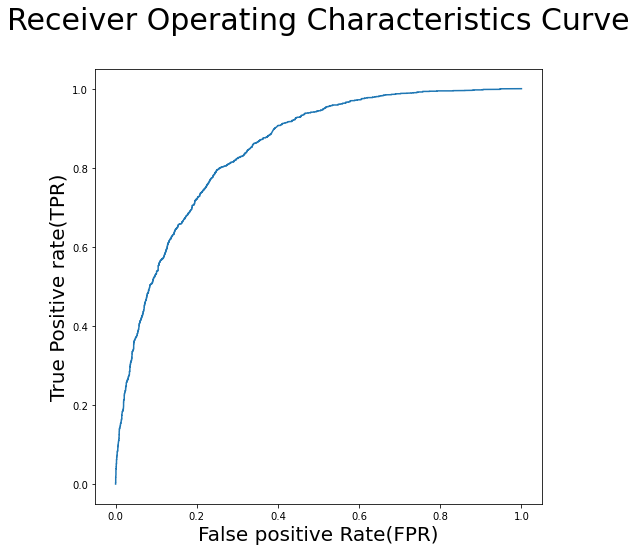

In [48]:
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlabel("False positive Rate(FPR)",fontdict={"fontsize":20})
plt.ylabel("True Positive rate(TPR)",fontdict={"fontsize":20})
plt.title("Receiver Operating Characteristics Curve\n",fontdict={"fontsize":30})

In [49]:
roc_df = pd.DataFrame({
    "tpr":tpr,
    "fpr":fpr,
    "thre":thresh
})

In [50]:
roc_df

,tpr,fpr,thre
0,0.000000,0.000000,1.000000
1,0.001384,0.000000,0.936900
2,0.002214,0.000000,0.936630
3,0.003320,0.000000,0.935026
4,0.003874,0.000000,0.934992
...,...,...,...
2236,1.000000,0.996956,0.010030
2237,1.000000,0.998340,0.009631
2238,1.000000,0.998893,0.009451
2239,1.000000,0.999723,0.009427


In [51]:
roc_df["tpr-fpr"] = roc_df["tpr"] - roc_df["fpr"]

In [52]:
roc_df[roc_df["tpr-fpr"]==max(roc_df["tpr-fpr"])]

,tpr,fpr,thre,tpr-fpr
1482,0.795241,0.250138,0.526987,0.545102


In [53]:
y_prob = pd.Series(y_pred_prob[:,1])

In [68]:
y_pred_train_new = y_prob.apply(lambda x:1 if x>0.526987 else 0)

In [69]:
confusion_matrix(y_train,y_pred_train_new)

array([[2710,  904],
       [ 740, 2874]], dtype=int64)

In [70]:
print(classification_report(y_train,y_pred_train_new))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      3614
           1       0.76      0.80      0.78      3614

    accuracy                           0.77      7228
   macro avg       0.77      0.77      0.77      7228
weighted avg       0.77      0.77      0.77      7228



In [71]:
accuracy_score(y_train,y_pred_train_new)

0.7725511898173769

Text(0.5, 1.0, 'FPR vs Threshold\n')

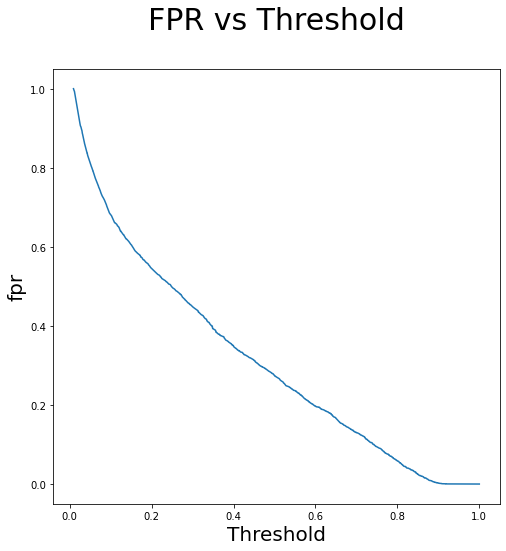

In [72]:
plt.figure(figsize=(8,8))
plt.plot(thresh,fpr)
plt.xlabel("Threshold",fontdict={"fontsize":20})
plt.ylabel("fpr",fontdict={"fontsize":20})
plt.title("FPR vs Threshold\n",fontdict={"fontsize":30})

Text(0.5, 1.0, 'FPR vs Threshold\n')

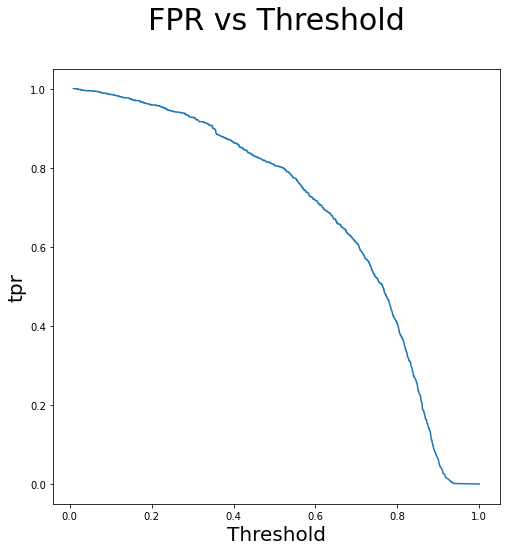

In [73]:
plt.figure(figsize=(8,8))
plt.plot(thresh,tpr,)
plt.xlabel("Threshold",fontdict={"fontsize":20})
plt.ylabel("tpr",fontdict={"fontsize":20})
plt.title("FPR vs Threshold\n",fontdict={"fontsize":30})

Text(0, 0.5, 'Scale')

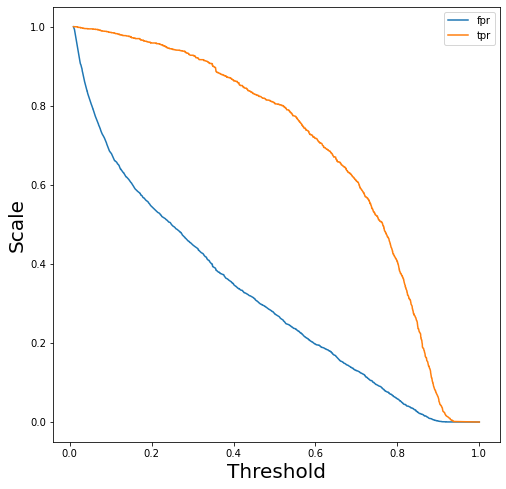

In [74]:
plt.figure(figsize=(8,8))
plt.plot(thresh,fpr)
plt.plot(thresh,tpr)
plt.legend(["fpr","tpr"])
plt.xlabel("Threshold",fontdict={"fontsize":20})
plt.ylabel("Scale",fontdict={"fontsize":20})

In [75]:
y_train

7840    1
5781    0
4799    0
6828    1
2365    0
       ..
8749    1
1772    0
2905    0
1759    0
2869    0
Name: Churn, Length: 7228, dtype: int64

In [76]:
x_train.iloc[1]

SeniorCitizen                               0
tenure                                     40
gender_Female                               1
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 1
Dependents_No                               0
Dependents_Yes                              1
PhoneService_No                             1
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              1
MultipleLines_Yes                           0
InternetService_DSL                         1
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           1
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                             0
OnlineBackup_No internet service            0
OnlineBackup_Yes                  

In [77]:
Original_features = x_original.columns.tolist()

In [78]:
Features = x.columns.tolist()

In [79]:
model_data = {
    
    "Original_features":Original_features,
    "Features":Features
}

In [80]:
with open("churn_model.pkl","wb") as f:
    pickle.dump(LogReg_model,f)


In [81]:
with open("model_data.json","w") as f:
    json.dump(model_data,f)